This project applies a K-Nearest Neighbors (KNN) classification algorithm to predict whether an individual's income exceeds $50K/year based on demographic features from the UCI Adult dataset. The objective is to demonstrate basic supervised learning techniques with preprocessing, model building, and evaluation.

 Importing Required Libraries

In [51]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

warnings.filterwarnings('ignore')
df=pd.read_csv(r'C:\Users\SHAHIN\OneDrive\Desktop\ml project\adult salary knn\adult.csv')
df.drop(['fnlwgt', 'race'], axis=1, inplace=True)
df.columns=df.columns.str.replace("-","_")
print(df.columns)
df.head(10)

Index(['age', 'workclass', 'education', 'educational_num', 'marital_status',
       'occupation', 'relationship', 'gender', 'capital_gain', 'capital_loss',
       'hours_per_week', 'native_country', 'income'],
      dtype='object')


,age,workclass,education,educational_num,marital_status,occupation,relationship,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Male,7688,0,40,United-States,>50K
4,18,?,Some-college,10,Never-married,?,Own-child,Female,0,0,30,United-States,<=50K
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,Male,0,0,30,United-States,<=50K
6,29,?,HS-grad,9,Never-married,?,Unmarried,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,Male,3103,0,32,United-States,>50K
8,24,Private,Some-college,10,Never-married,Other-service,Unmarried,Female,0,0,40,United-States,<=50K
9,55,Private,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,Male,0,0,10,United-States,<=50K


DATA CLEANING PROCESS

In [52]:
df.replace('?', pd.NA, inplace=True)
df.dropna(inplace=True)
#Drop duplicates
df.drop_duplicates(inplace=True)

ENCODING AND SPLITTING DATA

In [53]:

X = df.drop('income', axis=1)
y = df['income']
X = pd.get_dummies(X)

DATA VISUALISATION AND CORELATION

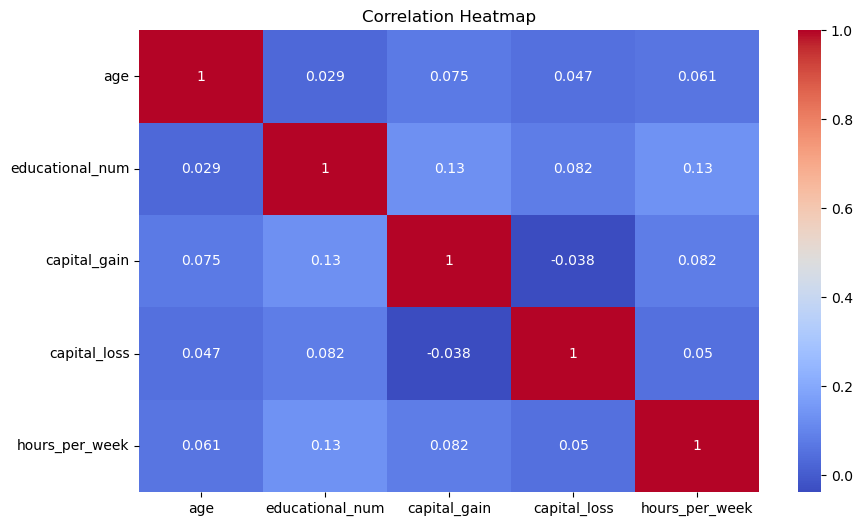

In [54]:
cor_matrix = df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(cor_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

SPLITTING TEST AND TRAIN DATA

In [55]:

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


SCALING

In [56]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

MODEL BUILDING

In [57]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)


KNeighborsClassifier()

In [58]:
###PREDICTING AND CHECKING ACCURACY
y_pred = knn.predict(x_test)
#Evaluation metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", metrics.classification_report(y_test, y_pred))

Accuracy: 0.8078631138975967

Classification Report:
               precision    recall  f1-score   support

       <=50K       0.85      0.89      0.87      5668
        >50K       0.65      0.57      0.61      1988

    accuracy                           0.81      7656
   macro avg       0.75      0.73      0.74      7656
weighted avg       0.80      0.81      0.80      7656



GIVING NEW SAMPLE

In [62]:
S = pd.DataFrame([{
    'age': 2,
    'workclass': 'Private',
    'education': 'Some-college',
    'educational_num': 6,
    'marital_status': 'Never-married',
    'occupation': 'Prof-specialty',
    'relationship': 'Unmarried',
    'gender': 'Male',
    'capital_gain': 0,
    'capital_loss': 0,
    'hours_per_week': 60,
    'native_country': 'United-States'
}])
se = pd.get_dummies(S)
se = se.reindex(columns=X.columns, fill_value=0)
prediction = knn.predict(se)
print("Predicted Income Class:", ">50K" if prediction[0] else "<=50K")

Predicted Income Class: >50K


Outcome Summary:

-Model Used: K-Nearest Neighbors (KNN)

-Data Preprocessing: Cleaned missing values, scaled features, and encoded categoricals

-Evaluation Metrics: Accuracy, precision, recall, F1-score 